### Import libraries and load dataset

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('IRIS.csv')

### Explore data

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Visualise the data 

<AxesSubplot:>

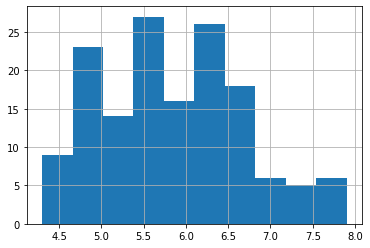

In [7]:
df['sepal_length'].hist(bins=10)

<AxesSubplot:>

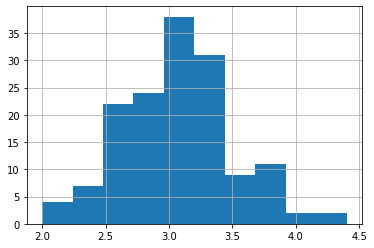

In [10]:
df['sepal_width'].hist(bins=10)

<AxesSubplot:xlabel='petal_length'>

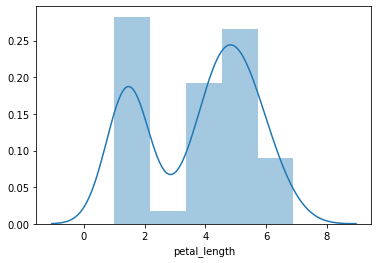

In [11]:
sns.distplot(df['petal_length'])

# Model Building

In [54]:
x = df.iloc[: , [0,1,2,3]].values

### 2 Clusters Model

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 101)
y = kmeans.fit_predict(x)

In [15]:
kmeans.cluster_centers_

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36037736, 1.56226415, 0.28867925]])

In [16]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

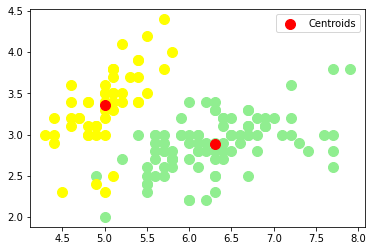

In [32]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], s=100, c = 'lightgreen')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s=100, c = 'yellow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

### 4 Clusters Model

In [33]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 101)
y = kmeans.fit_predict(x)

kmeans.cluster_centers_

array([[6.23658537, 2.85853659, 4.80731707, 1.62195122],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [5.52962963, 2.62222222, 3.94074074, 1.21851852]])

In [34]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0])

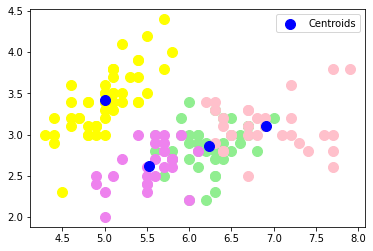

In [39]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], s=100, c = 'lightgreen')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s=100, c = 'yellow')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s=100, c = 'pink')
plt.scatter(x[y == 3, 0], x[y == 3, 1], s=100, c = 'violet')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.legend()

### 5 Clusters Model

In [40]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 101)
y = kmeans.fit_predict(x)

kmeans.cluster_centers_

array([[5.51538462, 2.60769231, 3.93076923, 1.20769231],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [6.22105263, 2.85526316, 4.75263158, 1.57105263],
       [7.475     , 3.125     , 6.3       , 2.05      ]])

In [41]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 4, 2, 2, 4, 0, 4, 2, 4,
       2, 2, 2, 3, 2, 2, 2, 4, 4, 3, 2, 3, 4, 3, 2, 4, 3, 3, 2, 4, 4, 4,
       2, 3, 3, 4, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3])

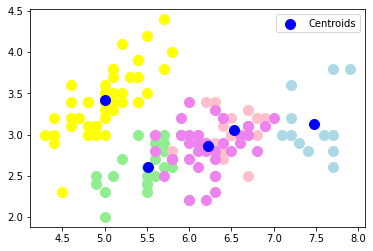

In [43]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], s=100, c = 'lightgreen')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s=100, c = 'yellow')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s=100, c = 'pink')
plt.scatter(x[y == 3, 0], x[y == 3, 1], s=100, c = 'violet')
plt.scatter(x[y == 4, 0], x[y == 4, 1], s=100, c = 'lightblue')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.legend()

# Elbow method

### Finding optimal number of clusters using 'within cluster sum of squares - wcss' 

In [44]:
wcss = []

for i in range(1,11):
    kmeans =  KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

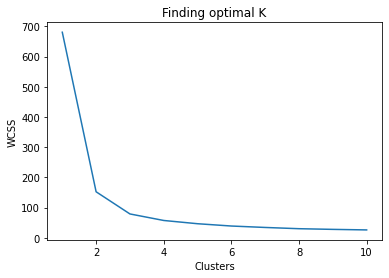

In [55]:
plt.plot(range(1,11), wcss)
plt.title("Finding optimal K")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

### The optimum clusters count is K=3 as it is at 3 the elbow occurs.  Hence we apply K-means clustering to the dataset with K=3

In [56]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init=10, random_state = 101)
y=kmeans.fit_predict(x)

In [57]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [58]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

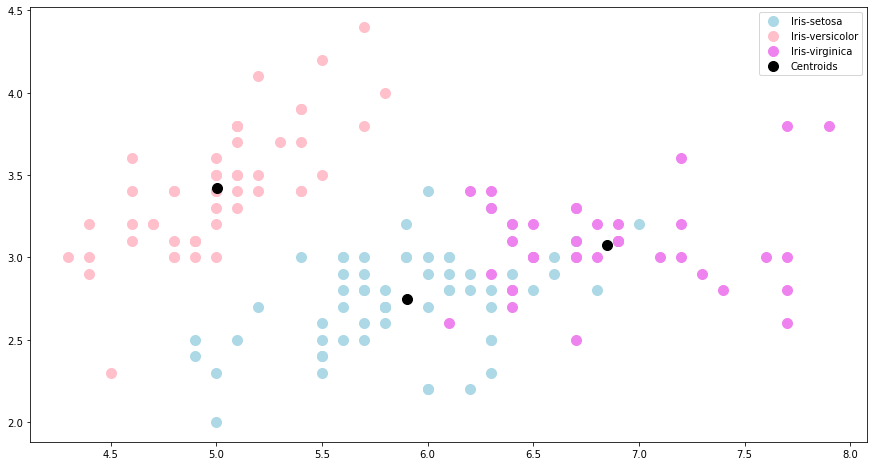

In [60]:
#Visualising the clusters 

plt.figure(figsize=(15,8))

plt.scatter(x[y == 0, 0], x[y == 0, 1], s=100, c = 'lightblue', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s=100, c = 'pink', label = 'Iris-versicolor')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s=100, c = 'violet', label = 'Iris-virginica')

#Plotting centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.legend()